In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im=(im-im.mean())/im.std()

def scale(x0):
    min_,max_=x0.min(),x0.max()
    nx,ny=x0.shape
    x=np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            x[i,j]=(x0[i,j]-min_)/(max_-min_)
    return x

#plt.imshow(scale(im))
im_a=(scale(im)*255).astype(np.uint8)


tif = TIFF.open('fig2a.tif', mode='w')
 
# to write a image to tiff file
 
tif.write_image(im_a)

del tif

im_ = im.reshape(128, 8, 128,8).mean(-1).mean(1)
print(im_.mean(),im_.std())

im_b=(scale(im_)*255).astype(np.uint8)

tif = TIFF.open('fig2b.tif', mode='w')
 
# to write a image to tiff file
 
tif.write_image(im_b)

del tif

fft_im_=fft.dctn(im_)
im_c=(scale(fft_im_)*255).astype(np.uint8)

tif = TIFF.open('fig2c.tif', mode='w')

tif.write_image(im_c)

del tif

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
0.0 0.9947948416756596


CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


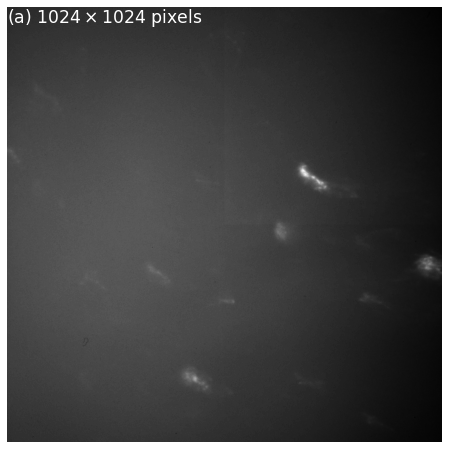

In [29]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im_a=(im-im.mean())/im.std()
plt.figure(figsize=(8,8))

plt.axis('off')
plt.imshow(im_a,cmap='gray')
plt.text(0,0,"(a) $1024\\times1024$ pixels",size='xx-large',verticalalignment='top',color='white')
plt.savefig('fig2a.tif',format='tif',bbox_inches ='tight')




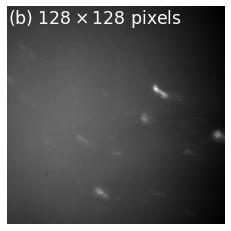

In [21]:
plt.clf()

im_b = im_a.reshape(128, 8, 128,8).mean(-1).mean(1)

plt.axis('off')
plt.imshow(im_b,cmap='gray')
plt.text(0,0,"(b) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

plt.savefig('fig2b.tif',format='tif',bbox_inches ='tight')



<Figure size 432x288 with 0 Axes>

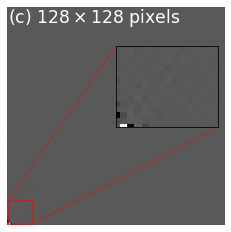

In [34]:
plt.clf()
im_c=fft.dctn(im_b)

fig, ax = plt.subplots(figsize=[5, 4])

ax.imshow(im_c,cmap='gray',origin='lower')
ax.text(0,128,"(c) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

# inset axes....
axins = ax.inset_axes([0.5, 0.4, 0.47, 0.47])
axins.imshow(im_c,origin='upper',cmap='gray')
# sub region of the original image
x1, x2, y1, y2 = 0,14,0,14
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(left=False,right=False,top=False,bottom=False)

axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins,edgecolor='red')

ax.axis('off')
plt.savefig('fig2c.tif',format='tif',bbox_inches ='tight')


CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(16384,)
(16384,)


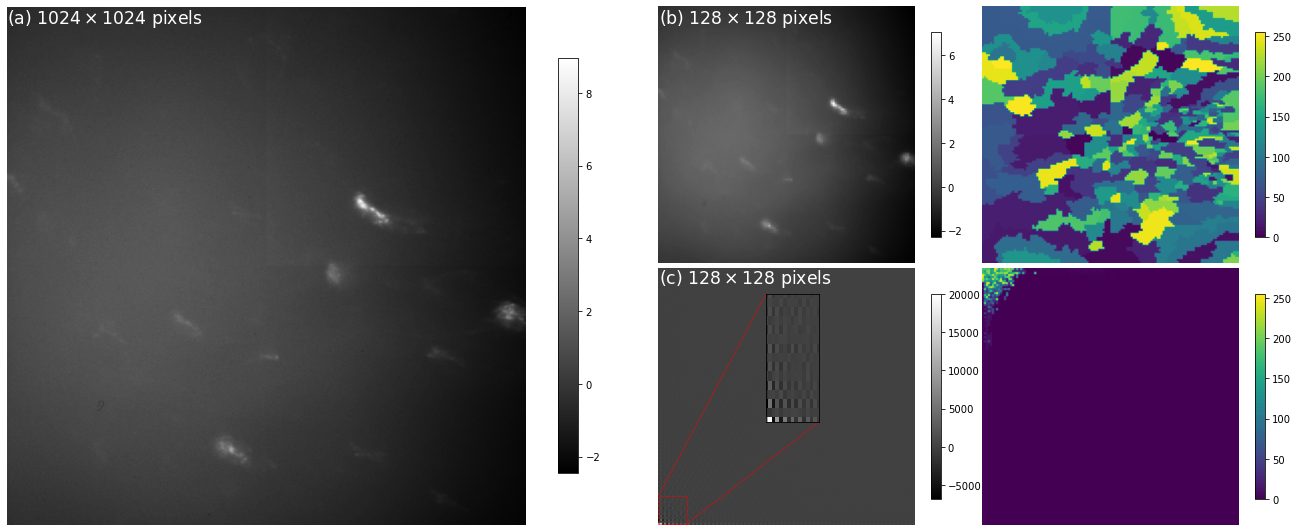

In [30]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im_a=(im-im.mean())/im.std()

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0, right=1.5,bottom=0,top=0.6, wspace=0.002,hspace=0.02)




ax1 = fig.add_subplot(gs[:2,:2])

ax1.axis('off')
im=ax1.imshow(im_a,cmap='gray')
ax1.text(0,0,"(a) $1024\\times1024$ pixels",size='xx-large',verticalalignment='top',color='white')

cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax2 = fig.add_subplot(gs[0,2])

im_b = im_a.reshape(128, 8, 128,8).mean(-1).mean(1)

ax2.axis('off')
im=ax2.imshow(im_b,cmap='gray')
ax2.text(0,0,"(b) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

cbar = fig.colorbar(im, shrink=0.8,ax=ax2)
########################################################################################

ax3 = fig.add_subplot(gs[1,2])
#axs[1,2].remove()
im_c=fft.dstn(im_b)
im=ax3.imshow(im_c,cmap='gray',origin='lower')
ax3.text(0,128,"(c) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

# inset axes....
axins = ax3.inset_axes([0.4, 0.4, 0.25, 0.5])
axins.imshow(im_c,origin='upper',cmap='gray')
# sub region of the original image
x1, x2, y1, y2 = 0,14,0,14
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(left=False,right=False,top=False,bottom=False)

axins.set_xticklabels('')
axins.set_yticklabels('')

ax3.indicate_inset_zoom(axins,edgecolor='red')

ax3.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax3)

########################################################################################

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo.fit(X)
FA_features=agglo.transform(X)

print(agglo.labels_.shape)

ax4 = fig.add_subplot(gs[0,3])

im=ax4.imshow(agglo.labels_.reshape((128,128)))

ax4.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax4)
########################################################################################

X = np.zeros((nx,ny,16384))
for i in range(nx):
    for j in range(ny):
        X[i,j]=fft.dstn(features[i,j].reshape((128,128))).ravel()
X=np.reshape(X,(nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo.fit(X)
FA_features=agglo.transform(X)

print(agglo.labels_.shape)

ax5 = fig.add_subplot(gs[1,3])

im=ax5.imshow(agglo.labels_.reshape((128,128)))

ax5.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax5)

########################################################################################
plt.savefig('fig2.tif',format='tif',bbox_inches ='tight')


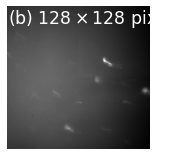

In [72]:
ax2= plt.subplot(222)#plt.subplot2grid((2,3), (0,1))

im_b = im_a.reshape(128, 8, 128,8).mean(-1).mean(1)

ax2.axis('off')
ax2.imshow(im_b,cmap='gray')
ax2.text(0,0,"(b) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.savefig('fig2_.tif',format='tif',bbox_inches ='tight')

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
(16384,)
(16384,)


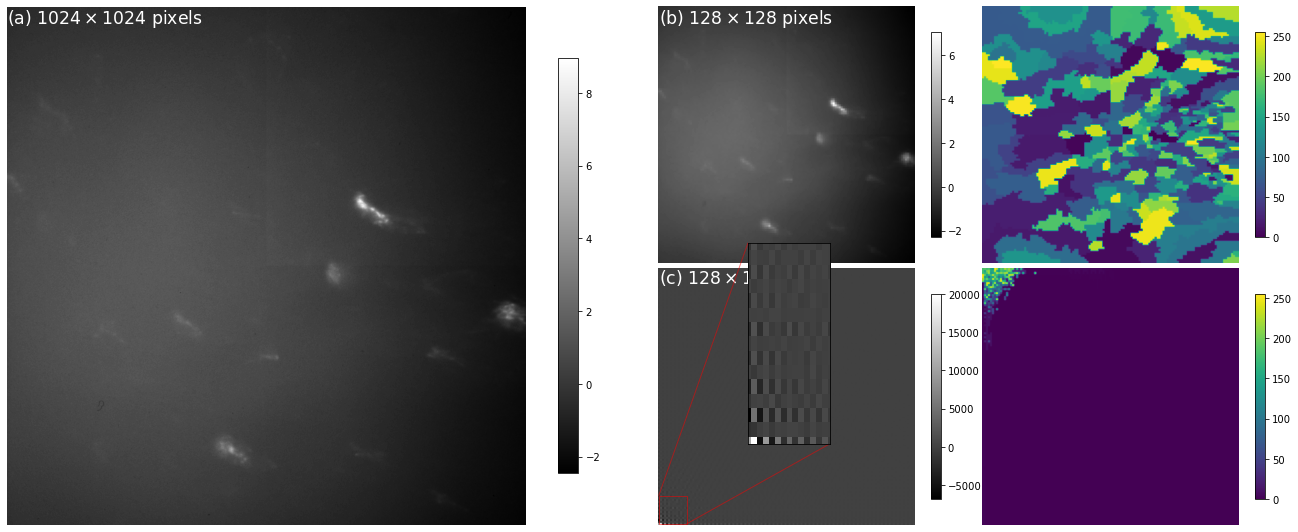

In [33]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im_a=(im-im.mean())/im.std()

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0, right=1.5,bottom=0,top=0.6, wspace=0.002,hspace=0.02)




ax1 = fig.add_subplot(gs[:2,:2])

ax1.axis('off')
im=ax1.imshow(im_a,cmap='gray')
ax1.text(0,0,"(a) $1024\\times1024$ pixels",size='xx-large',verticalalignment='top',color='white')

cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax2 = fig.add_subplot(gs[0,2])

im_b = im_a.reshape(128, 8, 128,8).mean(-1).mean(1)

ax2.axis('off')
im=ax2.imshow(im_b,cmap='gray')
ax2.text(0,0,"(b) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

cbar = fig.colorbar(im, shrink=0.8,ax=ax2)
########################################################################################

ax3 = fig.add_subplot(gs[1,2])
#axs[1,2].remove()
im_c=fft.dstn(im_b)
im=ax3.imshow(im_c,cmap='gray',origin='lower')
ax3.text(0,128,"(c) $128\\times 128$ pixels",size='xx-large',verticalalignment='top',color='white')

# inset axes....
axins = ax3.inset_axes([40,40, 50,100],transform=ax3.transData)
axins.imshow(im_c,origin='upper',cmap='gray')
# sub region of the original image
x1, x2, y1, y2 = 0,14,0,14
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(left=False,right=False,top=False,bottom=False)

axins.set_xticklabels('')
axins.set_yticklabels('')

ax3.indicate_inset_zoom(axins,edgecolor='red')

ax3.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax3)

########################################################################################

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo.fit(X)
FA_features=agglo.transform(X)

print(agglo.labels_.shape)

ax4 = fig.add_subplot(gs[0,3])

im=ax4.imshow(agglo.labels_.reshape((128,128)))

ax4.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax4)
########################################################################################

X = np.zeros((nx,ny,16384))
for i in range(nx):
    for j in range(ny):
        X[i,j]=fft.dstn(features[i,j].reshape((128,128))).ravel()
X=np.reshape(X,(nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo.fit(X)
FA_features=agglo.transform(X)

print(agglo.labels_.shape)

ax5 = fig.add_subplot(gs[1,3])

im=ax5.imshow(agglo.labels_.reshape((128,128)))

ax5.axis('off')
cbar = fig.colorbar(im, shrink=0.8,ax=ax5)

########################################################################################
plt.savefig('fig2.tif',format='tif',bbox_inches ='tight')